In [1]:
#%matplotlib notebook

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Resources/city_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [4]:
#NEED URL
#NEED TO ACCESS ALL 615 CITIES; needs to make an API call (take a bit longer). Create a list of cities to build loop
#tests_Cities = ["Phoenix", "Los Angeles", "Houston"]
#TURN ON 'cities' to run 615 cities, turn off 'tests_Cities'
weatherData = []
for city in cities:
#for city in tests_Cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    #to see the information do '.json()'
    #
    results = requests.get(url).json()
    try:
        data = {
            "City": results["name"], 
            "Cloudiness": results["clouds"]["all"],
            "Country": results["sys"]["country"],
            "Date": results["dt"],
            "Humidity": results["main"]["humidity"],
            "Lat": results["coord"]["lat"],
            "Lng": results["coord"]["lon"],
            "Max temp": results["main"]["temp_max"],
            "Wind Speed": results["wind"]["speed"]
        }
        #APPEND DATA TO OUR LIST 
        weatherData.append(data)
    except: 
        print(f"skip city:{city}")
#print(weatherData)

skip city:belushya guba
skip city:taolanaro
skip city:barentsburg
skip city:tumannyy
skip city:maloshuyka
skip city:bolungarvik
skip city:chagda
skip city:ngukurr
skip city:mys shmidta
skip city:attawapiskat
skip city:tsihombe
skip city:marcona
skip city:illoqqortoormiut
skip city:yirol
skip city:saleaula
skip city:warqla
skip city:tabiauea
skip city:vaitupu
skip city:candawaga
skip city:araguatins
skip city:samusu
skip city:nizhneyansk
skip city:hendijan
skip city:alotau
skip city:karaul
skip city:palabuhanratu
skip city:aflu
skip city:amderma
skip city:nguiu
skip city:khonuu
skip city:agva
skip city:bargal
skip city:dera din panah
skip city:labutta
skip city:dzhusaly
skip city:cam pha
skip city:viligili
skip city:sentyabrskiy
skip city:grand river south east
skip city:kopyevo
skip city:falealupo
skip city:zachagansk
skip city:barbar
skip city:azimur
skip city:sahrak
skip city:yanan


In [53]:
# EXPORT CSV, delete index column
# make sure output folder is correct above
# METHOD IS A FUNCTION INSIDE OF AN OBJECT (ex. pd.DataFrame())
weather_data = pd.DataFrame(weatherData)
weather_data.to_csv(output_data_file, index=False)

## Latitude vs. Temperature Plot
This plot is analyizing the latitude coordinates and the max temperature of the cities. There's a clear trend between the negative latitude coordinates moving into higher coordinates; between 0~23 is where we begin to see the peek of higher temperatures.

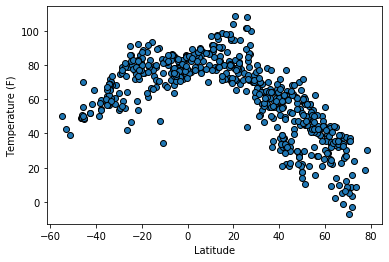

In [54]:
# Create a Scatter Plot
x_values = weather_data['Lat']
y_values = weather_data['Max temp']
plt.scatter(x_values,y_values, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

## Latitude vs. Humidity
This plot is based on latitude and humidity. There doesn't seem to be an obvious trend between latitude coordinates and humidity percentage. 

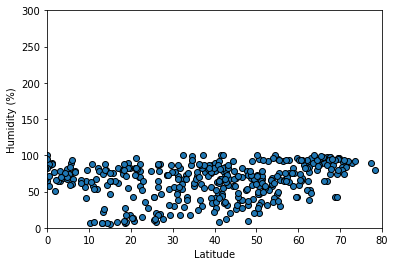

In [55]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Set the limits for the X and Y axes
plt.xlim(0,80)
plt.ylim(0,300)
plt.show()

## Latitude vs. Cloudiness Plot
In the below plot, there doesn't seem to be a noticeable trend. There is no indicator that it's cloudier as the latitude increases; however, there seems to be a cluster of plots between 40-60 on the 100 mark line of 'Cloudiness'.

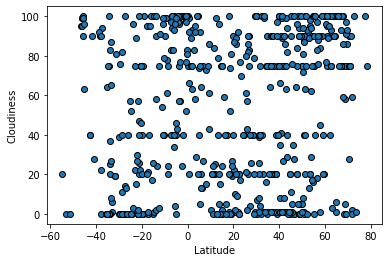

In [56]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed
There seems to be a slight increase and average in wind speed (between 0-5) as the latitude increases between 40-50.

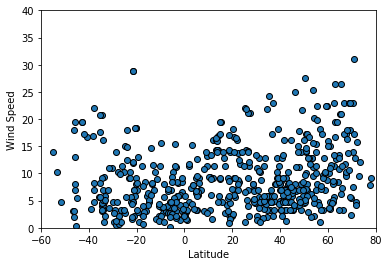

In [57]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Set the limits for the X and Y axes
plt.xlim(-60,80)
plt.ylim(0,40)
plt.show()

In [11]:
# NEED A BOOLEAN TO DIFFERENTIATE BETWEEN NORTHERN & SOUTHERN HEMISPHERE
# Northern = greater than or equal to 0 degrees latitude; Southern = less than 0 degrees latitude

In [12]:
northern_lat = weather_data.loc[weather_data["Lat"]>=0]
southern_lat = weather_data.loc[weather_data["Lat"]<0]

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression
The below plot is analyzing the max temperature of the cities compared to the latitude linear regression. In the graph, it's clear that there is a decrease in the temperature as the latitude increases.

In [38]:
# Add the linear regression equation and line to plot
# CREATE A FUNCTION: def name_of_function (x_values, y_values, ylabel)
# INPUT is declared upon calling the function 
# FUNCTION IN ANOTHER CASE: def name_of_function (INPUT that'll be used in the function)
def lin_reg (x_values, y_values, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.show()

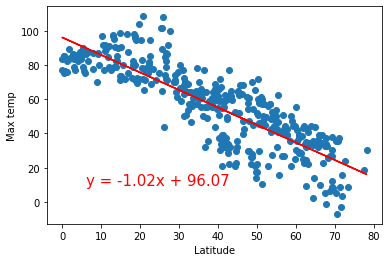

In [40]:
lin_reg(northern_lat['Lat'], northern_lat['Max temp'],'Max temp')

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression
Compared to the above plot of the Northern Hemisphere, we can see that the S. Hemisphere shows opposite results. Meaning, as the latitude increases, the max temp also increases.

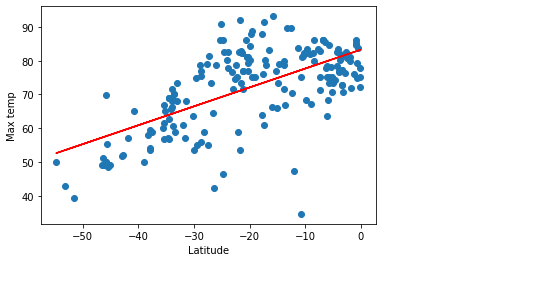

In [41]:
lin_reg(southern_lat['Lat'], southern_lat['Max temp'],'Max temp')

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
In the below plot, it doesn't seem to be a clear comparison between N. Hemisphere's latitude regression and the amount of humiditiy; however, there is a slight increase in humidity as latitude gets higher.

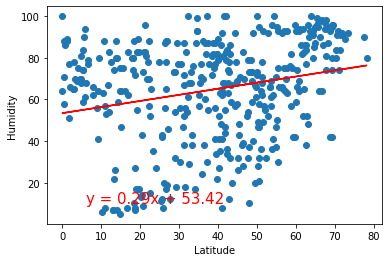

In [42]:
lin_reg(northern_lat['Lat'], northern_lat['Humidity'],'Humidity')

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
In the S. Hemisphere, we notice that there is little to none increase in humidity as the latitude increases.

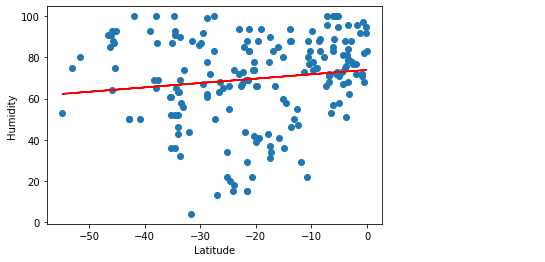

In [43]:
lin_reg(southern_lat['Lat'], southern_lat['Humidity'],'Humidity')

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
Based on the below linear regression, there is a major increase in cloudiness as latitude increases in the N. Hemisphere. 

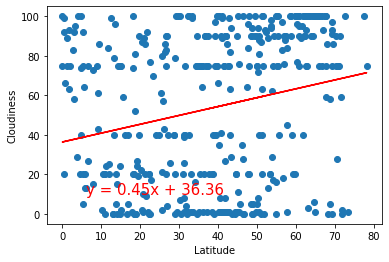

In [44]:
lin_reg(northern_lat['Lat'], northern_lat['Cloudiness'],'Cloudiness')

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
There's a clear major increase in cloudiness as the latitude makes its way to 0. This probably means that in the S. Hemisphere, there are less clouds than the N. Hemisphere.

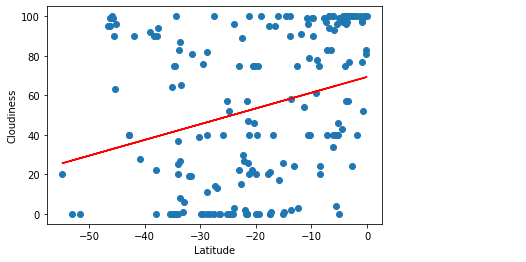

In [45]:
lin_reg(southern_lat['Lat'], southern_lat['Cloudiness'],'Cloudiness')

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
In the N. Hemisphere, wind speeds make a slight increase as latitude coordinates increase.

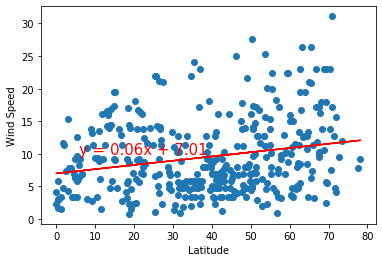

In [46]:
lin_reg(northern_lat['Lat'], northern_lat['Wind Speed'],'Wind Speed')

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
There is a clear decrease in wind speed as latitude makes its way to the 0 mark. Meaning, wind decreases based on the latitudes coordinates.

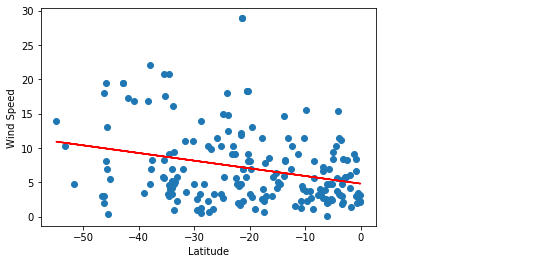

In [47]:
lin_reg(southern_lat['Lat'], southern_lat['Wind Speed'],'Wind Speed')